In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

from keras.models import model_from_json
from keras.preprocessing import image

Using TensorFlow backend.


In [2]:
#load model
model = model_from_json(open("fer.json", "r").read())
#load weights
model.load_weights('fer.h5')






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.






In [3]:
face_haar_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [4]:
cap=cv2.VideoCapture(0)

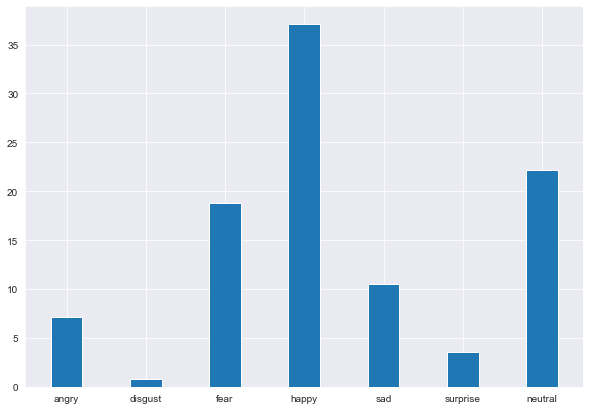

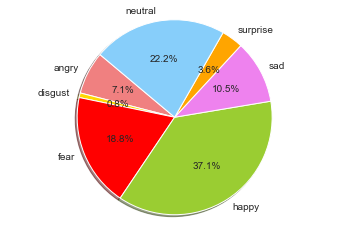

<function destroyAllWindows>

In [5]:
while True:
    ret,test_img=cap.read()# captures frame and returns boolean value and captured image
    if not ret:
        continue
    
    gray_img= cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

    faces_detected = face_haar_cascade.detectMultiScale(gray_img, 1.32, 5)


    for (x,y,w,h) in faces_detected:
        cv2.rectangle(test_img,(x,y),(x+w,y+h),(255,0,0),thickness=7)
        roi_gray=gray_img[y:y+w,x:x+h]#cropping region of interest i.e. face area from  image
        roi_gray=cv2.resize(roi_gray,(48,48))
        img_pixels = image.img_to_array(roi_gray)
        img_pixels = np.expand_dims(img_pixels, axis = 0)
        img_pixels /= 255

        predictions = model.predict(img_pixels)

        #find max indexed array
        max_index = np.argmax(predictions[0])

        emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
        predicted_emotion = emotions[max_index]

        cv2.putText(test_img, predicted_emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)

    resized_img = cv2.resize(test_img, (1000, 700))
    cv2.imshow('Facial emotion analysis ',resized_img)

    k=cv2.waitKey(1)
    if k==ord('m'):
        predictions = predictions.tolist()
        predictions = predictions[0]
        new_predictions=[i * 100 for i in predictions]   
        
        emotionlist=['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
                
        sns.set_style('darkgrid')
        fig=plt.figure(figsize=(10,7))
        plt.bar(emotionlist, new_predictions, width = 0.4)
        plt.xlabel("Emotions") 
        plt.ylabel("Percentage") 
        plt.title("Emotional Analysis Bar Graph") 
        
        for i in len(predictions): 
            plt.text(i.get_width()+0.2, i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize = 10, fontweight ='bold', color ='grey')
        
        plt.show()

        color=['lightcoral','gold','red','yellowgreen','violet','orange','lightskyblue']
        plt.pie(predictions, labels=emotionlist, colors=color,
        autopct='%1.1f%%', shadow=True, startangle=140)
        plt.axis('equal')
        plt.title("Emotional Analysis Pie Chart") 
        plt.show()
        continue
    elif k == ord('q'):
        cap.release()
        cv2.destroyAllWindows
        break
    elif k== None:
        continue

#     if cv2.waitKey(10) == ord('q'):#wait until 'q' key is pressed
#         break

cap.release()
cv2.destroyAllWindows